In [ ]:
# NOTE

# The below code was learned and adapted from various tutorials for and methods suggested by Fastai, an online platform
# that makes building, using and manipulating deep learning algorithms easier and more accessible to cs and deep learning beginners.
# As my background is architecture rather than computer science, I find platforms like fastai a great way to becomes
# acquainted with and exposed to deep learning concepts and techniques.
# More info can be found here:  https://www.fast.ai/
# the following tutorial was used to help guide the construction of this classification model: 
# https://docs.fast.ai/tutorial.vision.html#Single-label-classification

# **A. Connect to Google Drive**

In [18]:
# This was originally run on google colab pro due to its t4 / P100 GPU access features.
# In addition, all imports and below listed functionality works.
# Nonetheless, the below code can be run locally as well.
# Ensure that you have also downloaded the training dataset and locate it properly via the below prompts

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **B. Build & Train CNN model**

#### **1. Imports / Installs**

In [6]:
# Install torchvision (torch vision is pytorch's computer vision library consisting of  datasets, 
# model architectures, and common image transformations for computer vision)

In [7]:
pip install "torch==1.4" "torchvision==0.5.0"

ERROR: Operation cancelled by user


In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random


#### **2. Change directory**

In [9]:
# Change to your home directory to location where you downloaded this file
# below is my directory so will not work for you.  Please update with your own info

In [12]:
if os.getcwd() != '/content/drive/My Drive/Colab Notebooks/HumAI_TP_Mhasey':
    os.chdir('/content/drive/My Drive/Colab Notebooks/HumAI_TP_Mhasey')
    print("Directory changed.") 

Directory changed.


#### **3. Load data**

In [13]:
# Print out the names of all pre-labelled images to be used for model training
# In this case, we are using 100 images of occupied houses and 100 images of vacant houses

# set directory to location of training data set on your computer
labels = os.listdir("Data/1_Vacancy_Prediction_Training_Data")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

# set directory to location of training data set on your computer
for label in labels:
      print("{}, {} files".format(label, len(os.listdir("Data/1_Vacancy_Prediction_Training_Data/"+label))))

No. of labels: 2
-----------------
Occupied, 100 files
Vacant, 100 files


In [14]:
# remove models label which is made automatically, it is not needed.  
# If it does not appear listed in previous step, skip this.
labels.remove('models')

ValueError: ignored

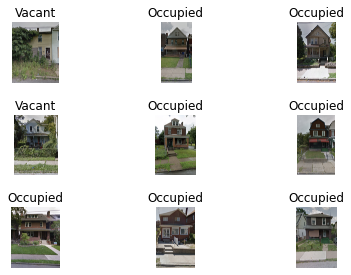

In [17]:
# Print out images with their associated labels to ensure data is being read correctly

fig, ax = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()
for row in ax:
    for col in row:
        count = random.randint(0,1)
        # ensure that you update directory link to match location of training data on your computer
        image_name = np.random.choice(os.listdir("Data/1_Vacancy_Prediction_Training_Data/" + labels[count]))
        im = Image.open("Data/1_Vacancy_Prediction_Training_Data/{}/{}".format(labels[count],image_name))
        col.imshow(im)
        col.set_title(labels[count])
        col.axis('off')
plt.show()

#### **4. Create model**

In [ ]:
# Import fastai to build image classification model
# Fastai was used as it simplifies training fast and effective neural networks using current best practices.
# More info can be found here:  https://www.fast.ai/
# the following tutorial was used to help guide the construction of this classification model: 
# https://docs.fast.ai/tutorial.vision.html#Single-label-classification

from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
# set directory to location of training data set
path = "./Data/1_Vacancy_Prediction_Training_Data/"
# specify image size (images to be transformed to this specified size). As hi-resolution not needed, this size was set low
size = 224
# select batch size - 64 was recommended for single label classification.  
bs = 64

In [ ]:
# Imagedatabunch is a fastai function that contains all the necessary functions to 
# define a Dataset and train a model for computer vision tasks.

data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=False),
                                  valid_pct=0.2, size=size, bs=bs)

In [ ]:
# normalize image data prior to training

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (159 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Occupied,Occupied,Occupied,Occupied,Occupied
Path: Data/1_Vacancy_Prediction;

Valid: LabelList (39 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Vacant,Vacant,Occupied,Occupied,Vacant
Path: Data/1_Vacancy_Prediction;

Test: None

In [ ]:
# create a learner used for transfer learning

learner = cnn_learner(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


#### **6. Fit model**

epoch,train_loss,valid_loss,accuracy,time
0,1.026836,0.634857,0.717949,00:23
1,0.925169,0.307401,0.846154,00:12
2,0.775756,0.327746,0.846154,00:10
3,0.651767,0.384956,0.871795,00:10
4,0.577101,0.297408,0.923077,00:10
5,0.484702,0.249878,0.948718,00:10
6,0.441965,0.339909,0.948718,00:10
7,0.387209,0.346605,0.948718,00:10
8,0.350041,0.327927,0.948718,00:10
9,0.309315,0.313830,0.923077,00:10


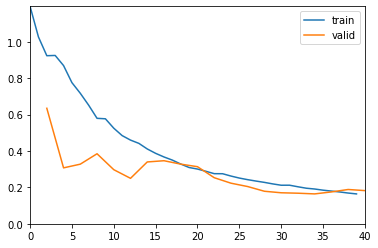

In [ ]:
learner.fit_one_cycle(20, max_lr=slice(1e-4, 1e-2))

# This passes a range of learning rates...meaning train the first layers
# at 1e-4 and the last layers at le-2....the earlier layers dont need
# to train more because they are much simpler...hence a lower learning rate.

#output includes training loss, valid loss, accuracy and associated graph



#### **7. Save / load model weights (if required)**

In [ ]:
# save your weights to be used in prediction model

learner.save('weights_1')
# learner.load('weights_path')

In [ ]:
# pickle and export model

learner.export('export.pkl')

#### **8. Model analysis**

In [ ]:
# use intepreter to analyze trained single-image classification model

interpreter = ClassificationInterpretation.from_learner(learner)

In [ ]:
# print out worst results

interpreter.most_confused(min_val=2)

[]

#### **9. Model results**

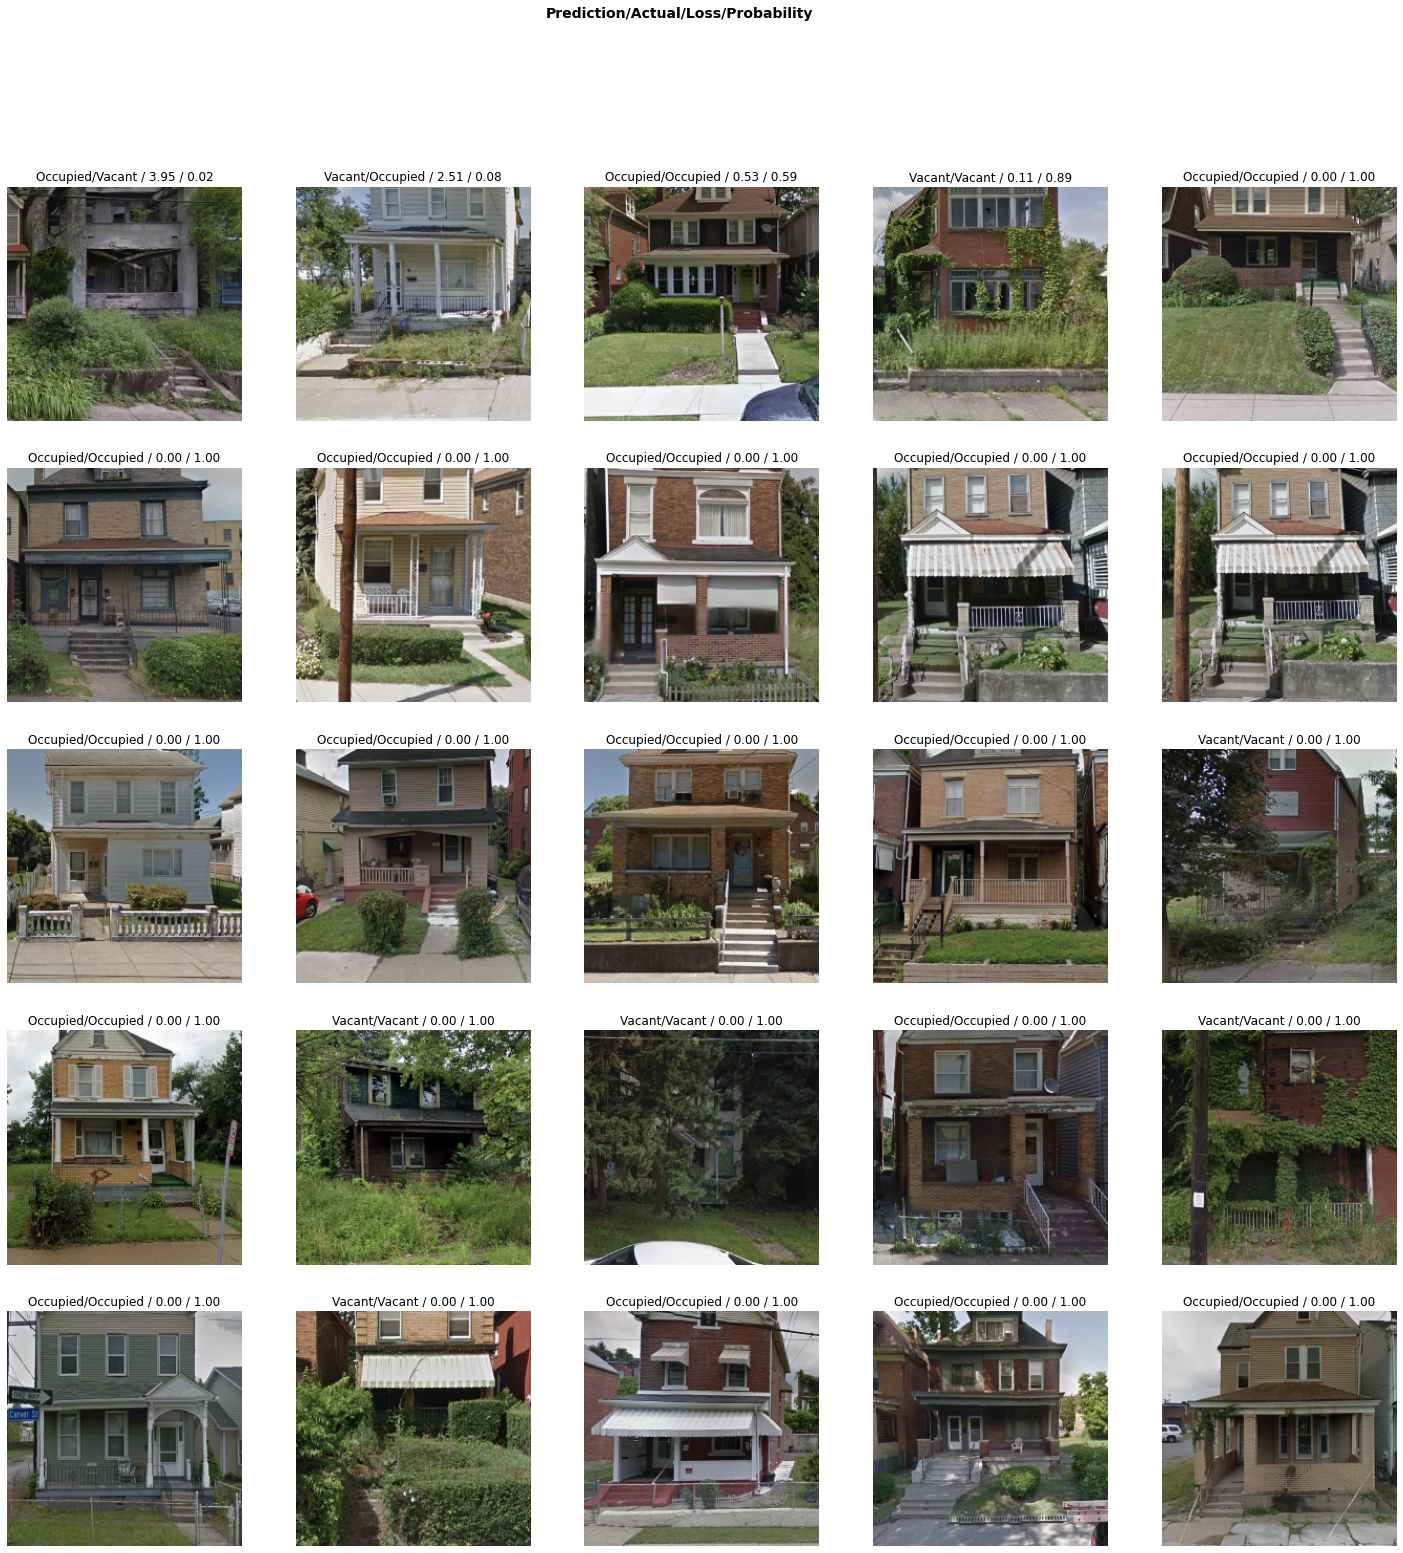

In [ ]:
interpreter.plot_top_losses(25, figsize=(25,25))

# shows predictions with largest loss function (biggest error)

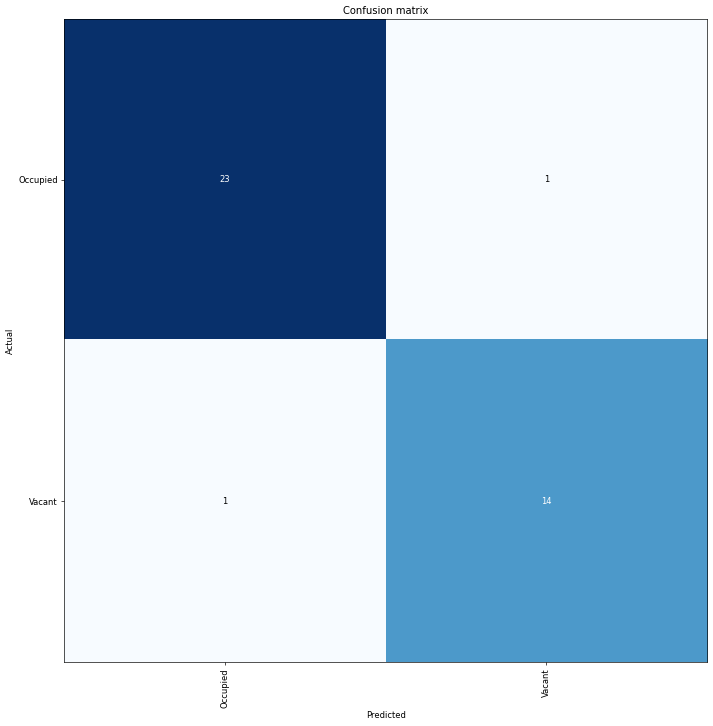

In [ ]:
# plot confusion matrix

interpreter.plot_confusion_matrix(figsize=(12,12), dpi=60)

#### **10. MODEL RESULTS - MORE INFO**

In [ ]:
# to understand results, access detailed info from documents

doc(interpreter.plot_top_losses)